In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sudachk/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [1]:

import nltk 

from nltk.corpus import gutenberg 

import string 

import pandas as pd 

import numpy as np 

import matplotlib.pyplot as plt 

import seaborn as sns 


# Download the Gutenberg corpus 

nltk.download('gutenberg') 



# Load the data 

data = [] 

for file_id in gutenberg.fileids(): 

    document = ' '.join(gutenberg.words(file_id)) 

    data.append(document) 

df = pd.DataFrame(data, columns=['text']) 


# View the first few rows of the data 

print(df.head()) 


# Check the size of the dataset 

print("Dataset size:", df.shape) 

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/sudachk/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


                                                text
0  [ Emma by Jane Austen 1816 ] VOLUME I CHAPTER ...
1  [ Persuasion by Jane Austen 1818 ] Chapter 1 S...
2  [ Sense and Sensibility by Jane Austen 1811 ] ...
3  [ The King James Bible ] The Old Testament of ...
4  [ Poems by William Blake 1789 ] SONGS OF INNOC...
Dataset size: (18, 1)


[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/sudachk/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


                                                text
0  [ Emma by Jane Austen 1816 ] VOLUME I CHAPTER ...
1  [ Persuasion by Jane Austen 1818 ] Chapter 1 S...
2  [ Sense and Sensibility by Jane Austen 1811 ] ...
3  [ The King James Bible ] The Old Testament of ...
4  [ Poems by William Blake 1789 ] SONGS OF INNOC...
Dataset size: (18, 1)


/var/folders/kk/t2ggpzfs6js1m3mr05dhk9800000gn/T/ipykernel_58820/989003478.py:55: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['text_length'], bins=50, kde=False, color='blue')


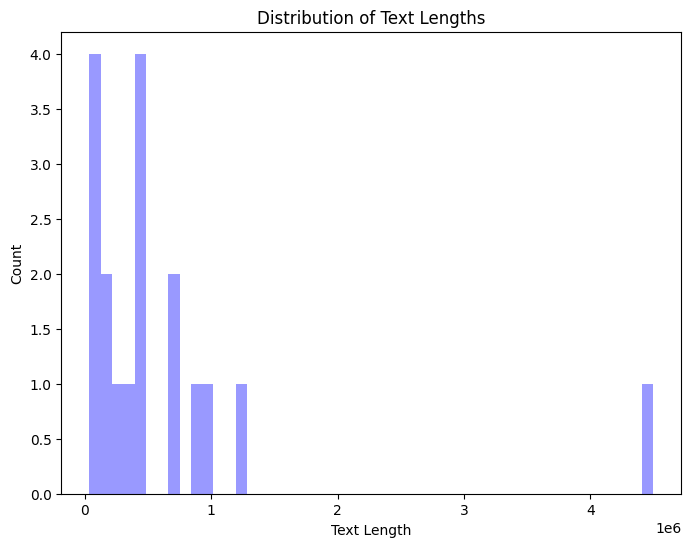

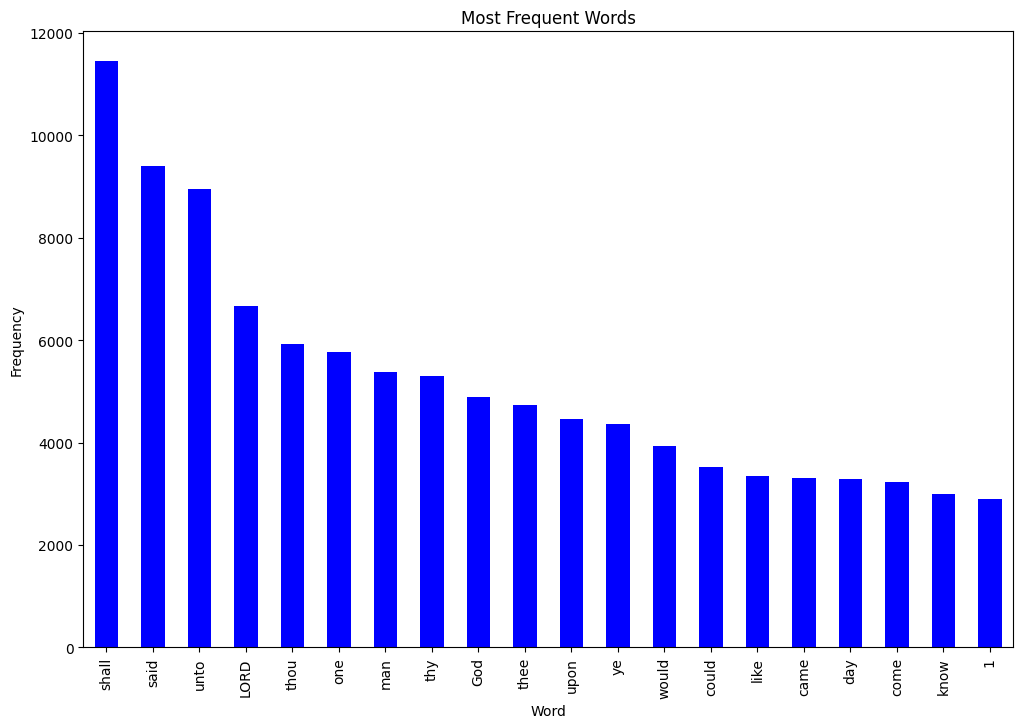

In [3]:


# Check the length of each document 

df['text_length'] = df['text'].apply(len) 


# Visualize the distribution of document lengths 

plt.figure(figsize=(8, 6)) 

sns.distplot(df['text_length'], bins=50, kde=False, color='blue') 

plt.title('Distribution of Text Lengths') 

plt.xlabel('Text Length') 

plt.ylabel('Count') 

plt.show() 

# Remove punctuation and stop words 

def remove_punctuation(text): 

    return text.translate(str.maketrans('', '', string.punctuation)) 

def remove_stopwords(text): 

    stopwords_list = nltk.corpus.stopwords.words('english') 

    return " ".join([word for word in text.split() if word.lower() not in stopwords_list]) 

  

df['text_clean'] = df['text'].apply(remove_punctuation) 

df['text_clean'] = df['text_clean'].apply(remove_stopwords) 


# Count the frequency of each word 

word_freq = pd.Series(np.concatenate([x.split() for x in df['text_clean']])).value_counts() 


# Visualize the most frequent words 

plt.figure(figsize=(12, 8)) 

word_freq[:20].plot(kind='bar', color='blue') 

plt.title('Most Frequent Words') 

plt.xlabel('Word') 

plt.ylabel('Frequency') 

plt.show() 